In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as scipy_stats

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/MyDrive/data-mining/* ./

In [ ]:
def operation(df):
  columns = list(df.columns)

  removed_columns = []
  column_types = df.dtypes.to_list()
  for i in range(len(columns)):
      column_type = str(column_types[i])
      if column_type in ['str', 'object']:
          df.drop(columns[i], axis=1, inplace=True)
          removed_columns.append(columns[i])

  result = {}

  for column in columns:
      if column in removed_columns: continue

      data = df[column].to_frame()
      data.dropna(inplace=True)
      dtype = str(data.dtypes[0])

      if len(data) == 0: continue

      data = data.to_numpy()
      data_type = data.dtype
      data_min_all = data.min()
      data_max_all = data.max()
      data_mean = data.mean()
      Q1, data_median, Q3 = np.percentile(data, [25, 50, 75])
      data_mode = scipy_stats.mode(data)[0][0]
      data_range = f'{data_min_all} to {data_max_all}'

      IQR = Q3 - Q1
      IQR_ub = Q3 + 1.5 * IQR # data upper bound
      IQR_lb = Q1 - 1.5 * IQR # data lower bound

      data_max = min(IQR_ub, data_max_all)
      data_min = max(IQR_lb, data_min_all)

      outliers = 0
      for x in data:
          if x < data_min or x > data_max:
              outliers += 1

      result[column] = {
          'mean': data_mean,
          'mode': data_mode,
          'type': data_type,
          'range': data_range,
          'median': data_median,
          'min': data_min,
          'max': data_max,
          'outliers': outliers,
      }

  df.boxplot(fontsize=18, figsize=(180, 40))
  dframe = pd.DataFrame(result)

  pd.set_option('display.max_rows', None)
  pd.set_option('display.max_columns', None)
  pd.set_option('display.width', None)
  pd.set_option('display.max_colwidth', -1)

  return(dframe)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,INOUT_ID,AD_CLIENT_ID,AD_ORG_ID,CREATEDBY,UPDATEDBY,DOCUMENTNO,C_DOCSTATUS_ID,REF_ORG,C_COSTCENTER_ID,COM_BPARTNER_ID,M_PRODUCT_ID,REQUESTNO,RESPONSIBLEMANAGER,FROMUSERMANAGERID,COM_BPARTNER_ID_F,M_INOUT_AMVAL_ID,DOCUMENTNO1,LOCATIONS_ID,ACCT_AC_HOLDING_ID,VAHED_MALI,ACCT_AC_JOURNAL_ID,BASEINFO_RECORDID,C_YEAR_ID
mean,469621724.545263,104000002.0,25767368.916579,285063624.917368,285882567.939868,3731.72348,3000025.3975,245089627.185517,124456971.261451,188808963.487999,300003210.0,261761.182927,25613736.585366,105004676.790123,297623777.5,471333407.0,465.038793,1039317.235619,1.172677,209984023.944995,467716741.200286,469640155.598734,469998939.978344
mode,[210032665],[104000002],[0],[210032662],[210032662],[25.0],[3000025],[200000137.0],[1802.0],[105003577.0],[300003210.0],[373087.0],[0.0],[105004688.0],[300001761.0],[471333407.0],[7.0],[1000145.0],[1.0],[200000138.0],[470900761.0],[469638726.0],[469637411.0]
type,int64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
range,210032665 to 470744641,104000002 to 104000002,0 to 104000002,210032662 to 469640523,210032662 to 470766401,1.0 to 7608.0,3309 to 6000035,5115060.0 to 469748902.0,11.0 to 469638299.0,0.0 to 301397351.0,300003210.0 to 300003210.0,111.0 to 396818.0,0.0 to 210032640.0,105003780.0 to 105004688.0,105004273.0 to 300005012.0,471333407.0 to 471333407.0,1.0 to 13877.0,1000042.0 to 2100941.0,1.0 to 21.0,1.0 to 469718709.0,2211.0 to 471034321.0,469638313.0 to 470900619.0,469637408.0 to 470737412.0
median,469641532.5,104000002.0,0.0,210032662.0,210032662.0,3728.5,3000025.0,200000696.0,1806.0,105004794.0,300003210.0,303442.0,0.0,105004688.0,300001761.0,471333407.0,138.5,1000147.0,1.0,200000138.0,470900619.0,469638574.0,469637411.0
min,469633883.0,104000002.0,0.0,210032662,210032662,1.0,3000025.0,184948954.5,11.0,0.0,300003210.0,111.0,0.0,105004688.0,300001761.0,471333407.0,1.0,1000042.0,1.0,200000138.0,470900351.0,469638313.0,469637408.0
max,469649181.0,104000002.0,0.0,469640523,470766401,7608.0,3000025.0,225085662.5,469638299.0,301397351.0,300003210.0,396818.0,0.0,105004688.0,300001761.0,471333407.0,1035.75,1000386.0,1.0,200000138.0,470901007.0,469639078.0,470737412.0
outliers,109,0,1883,0,0,0,17,1224,0,0,0,0,10,1,3,0,13,229,418,491,481,1,0


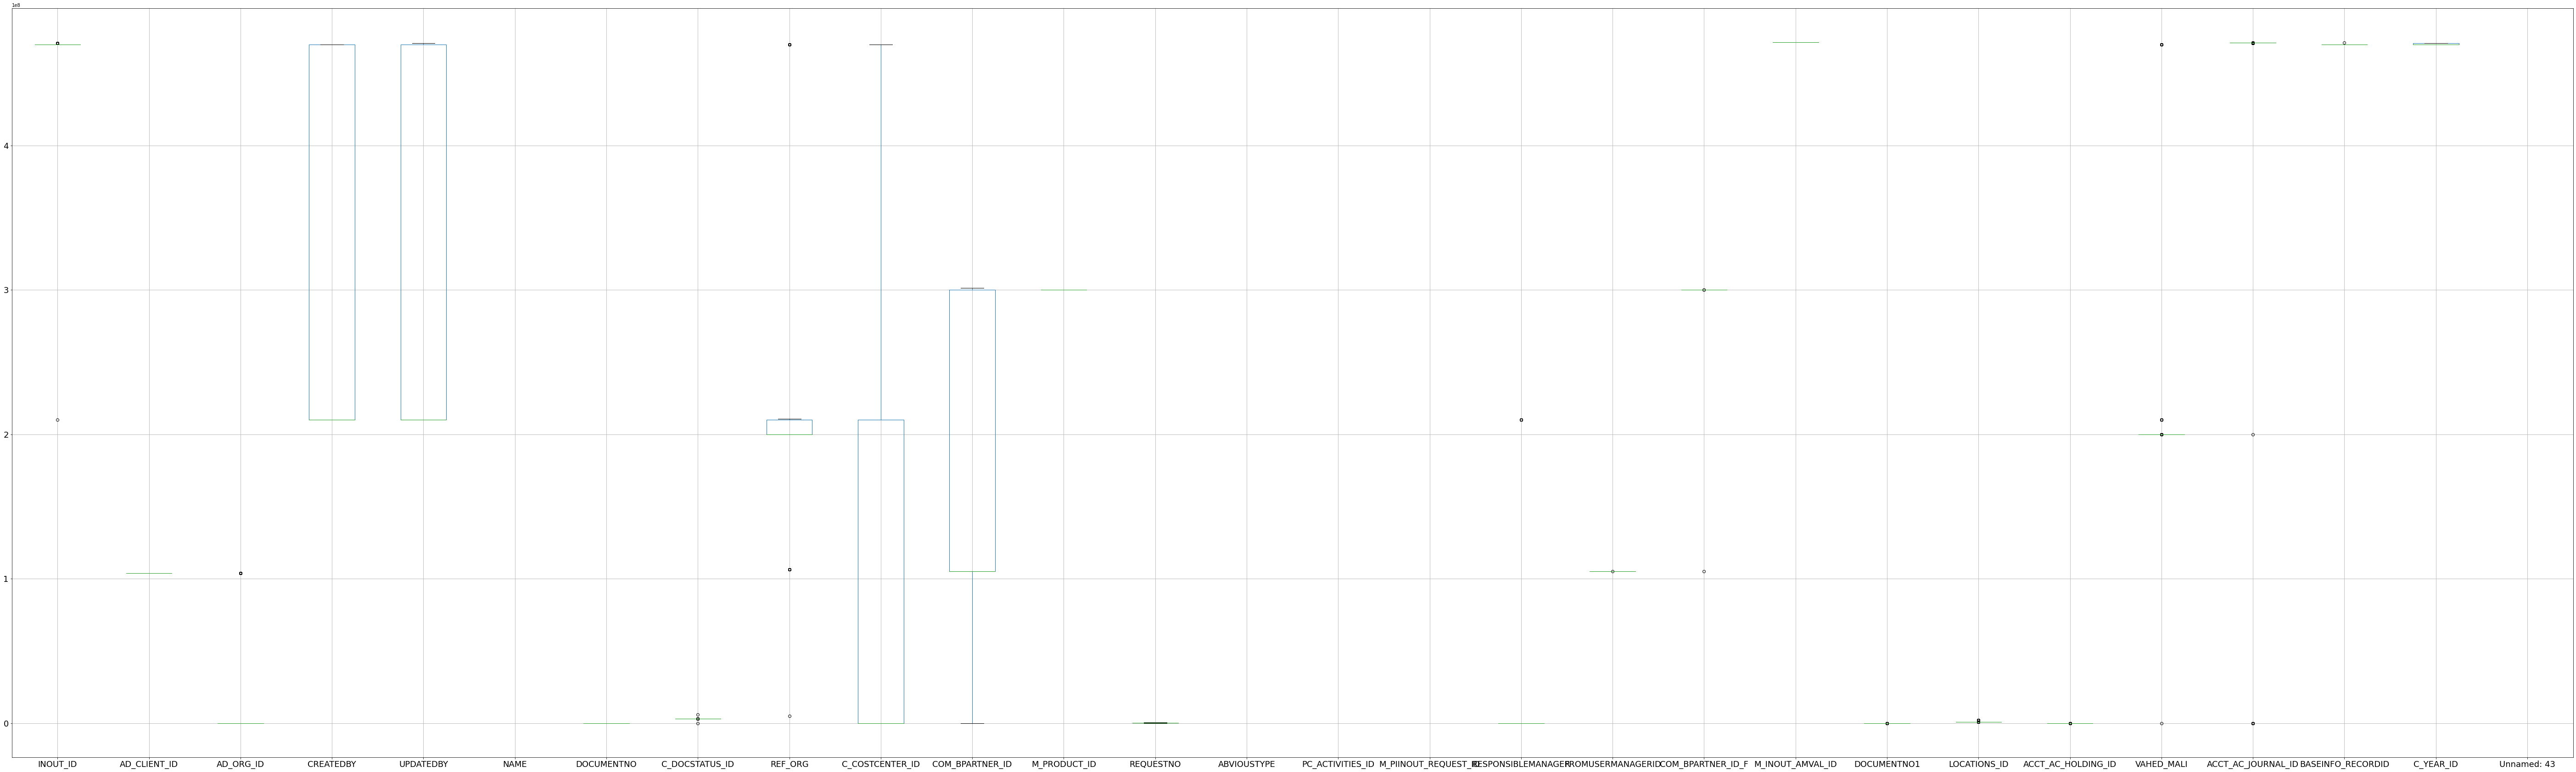

In [ ]:
INOUT = pd.read_csv('INOUT.csv')
display(operation(INOUT))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,12,32,39,40,41,44,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,INOUTLINE_ID,AD_CLIENT_ID,AD_ORG_ID,CREATEDBY,UPDATEDBY,QTY,FEE,TOTALPRICE,INOUT_ID,M_PRODUCTINSTANCE_ID,C_UOM_ID,M_PRODUCT_ID,ADDRESS_ID,ABVIOUSTYPE,A_ASSET_ID,ACCUMULATEDEPRECIATION,BOOKVALUE,PRIMALVALUE,QTYONPKG,CONSUMER,M_TAG_ID,M_WAREHOUSE_ID,M_PI_STATUS_ID,M_INOUT_AMVAL_ID,PRODUCT_BATCH_ID,LOCATIONS_ID,DEPRECATION_PERIOD,ESGHAT_VALUE,PELAK_FAREI,VAHED_MALI,BASEINFO_RECORDID,C_YEAR_ID,Unnamed: 55,Unnamed: 56,Unnamed: 57
mean,470357242.208684,104000002.0,108669793.341843,266540062.967363,266348539.725839,1.00001,0.000519,13124.047718,469646633.01624,214586610.152314,17.898615,256224787.703752,6590937.685646,1.01965,210609130.343476,409880.622786,698180.921477,14587039.151458,1.0,179484980.696018,466952737.73771,260956602.654023,5870688.234166,469986917.253191,471333407.0,1245391.554492,250051.25,0.0,91138000.0,213202257.328605,469262445.796082,469055002.47301,202942934.456522,469638651.0,469637411.0
mode,[210032666],[104000002],[200000138],[210619008],[210619008],[1.0],[0.0],[0.0],[469645794.0],[469675899.0],[20.0],[104010517.0],[0.0],[1.0],[210618919.0],[0.0],[1.0],[1.0],[1],[301567350.0],[469746946.0],[210618919.0],[5800001.0],[471333407.0],[471333407.0],[2000924.0],[2.0],[0.0],[91138000.0],[200000138.0],[469638651.0],[469637411.0],[200000138.0],[469638651.0],[469637411.0]
type,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
range,210032666 to 470910935,104000002 to 104000002,0 to 200000138,210032662 to 470766401,210032662 to 470766401,1.0 to 2.0,0.0 to 1.0,0.0 to 7000000.0,210032665.0 to 470744641.0,1167264.0 to 470974363.0,0.0 to 30.0,104003854.0 to 470757637.0,0.0 to 469639222.0,1.0 to 3.0,0.0 to 210618919.0,0.0 to 235600000.0,0.0 to 656448113.0,0.0 to 19540430000.0,1 to 1,7324.0 to 469663395.0,380.0 to 471037197.0,200000100.0 to 470737489.0,5800001.0 to 210618920.0,210034371.0 to 471618948.0,471333407.0 to 471333407.0,1000042.0 to 2100941.0,2.0 to 1000199.0,0.0 to 0.0,91138000.0 to 91138000.0,200000114.0 to 469718709.0,0.0 to 469638836.0,0.0 to 470737412.0,200000138.0 to 470737412.0,469638651.0 to 469638651.0,469637411.0 to 469637411.0
median,470789484.5,104000002.0,200000138.0,210619008.0,210619008.0,1.0,0.0,0.0,469645794.0,2008973.0,20.0,210035663.0,0.0,1.0,210618919.0,0.0,1.0,1880000.0,1.0,105004578.0,469767262.0,210618919.0,5800001.0,471333407.0,471333407.0,1000145.0,2.0,0.0,91138000.0,200000138.0,469638651.0,469637411.0,200000138.0,469638651.0,469637411.0
min,467936044.5,104000002.0,0,210032662,210032662,1.0,0.0,0.0,469638171.5,1167264.0,5.0,104003854.0,0.0,1.0,210618919.0,0.0,1.0,0.0,1.0,7324.0,469619306.0,209153219.0,5800001.0,468296594.5,471333407.0,1000042.0,2.0,0.0,91138000.0,200000138.0,469638651.0,469637411.0,200000138.0,469638651.0,469637411.0
max,470910935,104000002.0,200000138,211498527.0,211498527.0,1.0,0.0,0.0,469650367.5,470974363.0,29.0,470757637.0,0.0,1.0,210618919.0,598500.0,1.0,12879900.0,1.0,469663395.0,469910378.0,211498347.0,5800001.0,471618948.0,471333407.0,1002225.5,625125.125,0.0,91138000.0,200000138.0,469638651.0,469637411.0,200000138.0,469638651.0,469637411.0
outliers,1,0,0,22363,22287,1,1,13,2058,0,29,0,58,55,444,924,25508,15019,0,0,12509,10739,2602,324,0,3250,1,0,0,14622,15090,4758,1,0,0


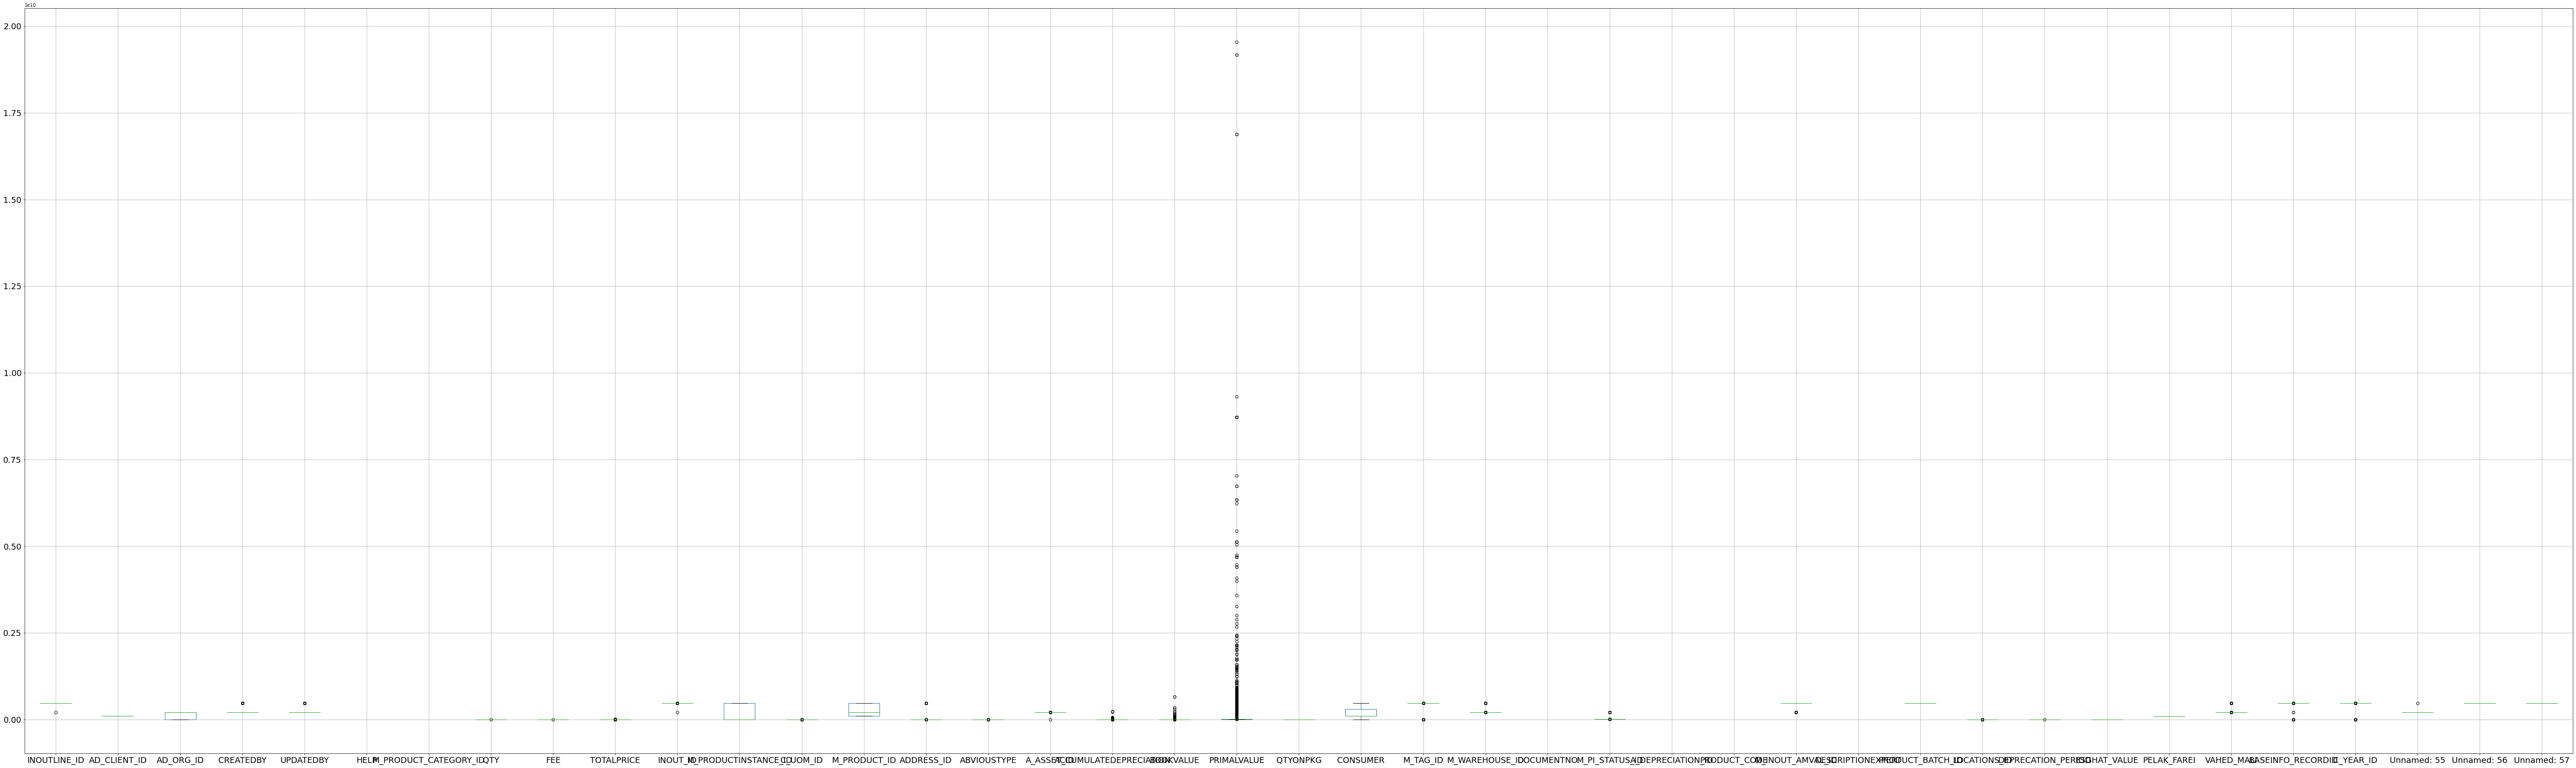

In [ ]:
INOUTLINE = pd.read_csv('INOUTLINE.csv')
display(operation(INOUTLINE))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,26,68,69,70,84,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,M_PRODUCT_ID,AD_CLIENT_ID,AD_ORG_ID,CREATEDBY,UPDATEDBY,UPC,C_UOM_ID,PARENT_PRODUCT,CODE,CODEDIGITS,NEXTLEVELDIGITS,M_BRAND_ID,AD_IMAGE_ID,M_GENUS_ID,M_COLOR_ID,IRANCODE,PRODUCTINFO1,PRODUCTINFO2,PRODUCTINFO3,PRODUCTINFO4,C_BASE_LOCATION_TYPE_ID,M_ACCOUNTINGPRODUCT_ID,ABVIOUSTYPE,RESPONSIBLEPOST,DESC1,M_ACCOUNTINGASSET_ID,M_PRODUCT_ID2,M_PRODUCT_TYPE_ID,ZARIBTABDIL,GROUP_PRODUCT,ESTEHLAK_GROUP_CODE,HAZINE_GROUP,SATH,PARENT_PRODUCT2,OLGO_M_PRODUCT_ID
mean,287603615.657526,103835815.145631,21.634862,213583667.174394,222667110.69561,21638842053.267582,6166239.431893,189165064.266453,42404835521011168.0,0.0,1.066328,152289987.810527,469637447.0,112625015.325581,105402796.31448,14.333333,121221632.643887,105920404.686019,115861285.354839,112270239.309213,5115006.5,306481245.28541,2.208624,106711884.830453,33.772727,210618926.767241,104012989.0,136961206.499844,1.0,0.016133,97.801315,4662.193394,4.762373,261153253.513004,1186061.114184
mode,[998],[104000002],[0],[200000101],[200000101],[80.0],[20.0],[10001.0],[0.0],[0],[1],[104000532.0],[469637447.0],[104000015.0],[104000004.0],[3.0],[70.0],[104001049.0],[104000429.0],[308.0],[5115005.0],[469637407.0],[3.0],[106536235.0],[1.0],[210618920.0],[104012989.0],[1000005.0],[1.0],[0],[181.0],[5209.0],[5.0],[469654735.0],[1200071.0]
type,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
range,998 to 470862751,0 to 104000002,0 to 1000396,1000037 to 469638479,100 to 469638479,80.0 to 8499300020101.0,1.0 to 469637421.0,0.0 to 470861605.0,0.0 to 8.97990007e+16,0 to 0,0 to 3,3.0 to 469638272.0,469637447.0 to 469637447.0,2.0 to 469637400.0,104000000.0 to 300000000.0,3.0 to 35.0,2.0 to 469637480.0,115.0 to 469637485.0,148.0 to 469637415.0,103.0 to 469637460.0,5115005.0 to 5115008.0,0.0 to 469637412.0,1.0 to 3.0,105005050.0 to 469638749.0,1.0 to 80.0,210618920.0 to 210618943.0,104012989.0 to 104012989.0,1000003.0 to 469637409.0,1.0 to 1.0,0 to 1,9.0 to 185.0,3764.0 to 13421.0,1.0 to 5.0,10001.0 to 469654883.0,1000001.0 to 1200080.0
median,210621188.5,104000002.0,0.0,210032749.0,210032749.0,839375.0,20.0,104005088.0,80292500050010000.0,0.0,1.0,104000532.0,469637447.0,104000014.0,104000004.0,5.0,104001868.0,104001050.0,104001911.0,104001027.0,5115006.5,469637406.0,3.0,106536235.0,19.5,210618922.0,104012989.0,1000005.0,1.0,0.0,74.0,4520.0,5.0,210035814.0,1200071.0
min,998,104000002.0,0.0,184071793.0,184071740.5,80.0,5.0,0.0,0.0,0.0,1.0,104000392.5,469637447.0,103999993.75,104000000.0,3.0,103996823.0,103999359.0,103997679.5,103997577.5,5115005.0,0.0,1.0,106536235.0,1.0,210618920.0,104012989.0,1000003.0,1.0,0.0,9.0,3764.0,5.0,10001.0,1200068.5
max,470862751,104000002.0,0.0,226547281.0,226547368.5,2078142.75,29.0,470861605.0,89799000700000000.0,0.0,1.0,104000764.5,469637447.0,104000027.75,104000028.0,35.0,104006073.0,104002279.0,104005011.5,104005501.5,5115008.0,469637412.0,3.0,106536235.0,80.0,210618943.0,104012989.0,469637409.0,1.0,0.0,185.0,6724.0,5.0,469654883.0,1200072.5
outliers,0,73,1,1587,3071,802,3488,0,0,0,1947,3094,0,5,10,0,1150,580,9,1035,0,0,0,115,0,0,0,0,0,746,0,1,6390,0,328


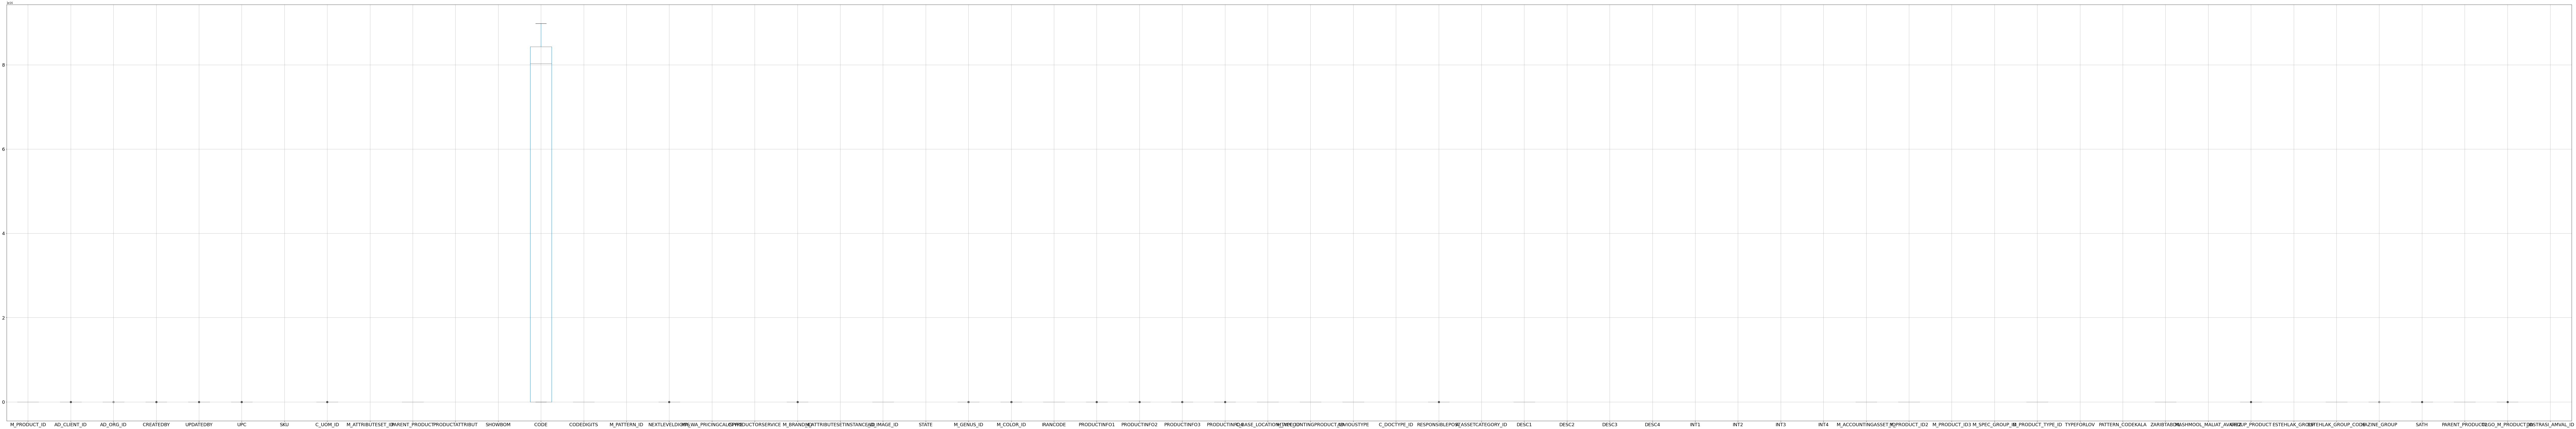

In [ ]:
PRODUCTS = pd.read_csv('PRODUCTS.csv')
display(operation(PRODUCTS))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,AD_CLIENT_ID,AD_ORG_ID,CREATEDBY,UPDATEDBY,NAME,COM_BPARTNER_ID,COSTLINE,OLDLABELNO,M_TRANSFER_KALA_ID,C_COSTCENTER_ID,FORM_STATUS,C_DOCTYPE_ID,C_DOCSTATUS_ID,DOCUMENTNO,ADDRESS,LOCATIONS_ID,ACCT_AC_HOLDING_ID,VAHED_MALI,RESPONSIBLEPOST,TYPEPROPERTY,BASEINFO_RECORDID,M_WAREHOUSE_ID,C_YEAR_ID
mean,104000002.0,281686629.491815,326354019.844485,324629382.675964,55907.0,196376953.089962,185567735.71396,263750583.0,18860.0,143651436.492674,10551.297884,263750583.0,15461039.09942,47876.925174,428814086.173913,1089493.521421,1.323011,253830798.034288,146064060.842105,1.217474,445970100.845084,290979977.945185,470187763.612996
mode,[104000002.0],[200000137],[210032662.0],[210033614.0],[11.0],[300001369.0],[105003577.0],[263750583.0],[16962.0],[200000115.0],[10000.0],[263750583.0],[3000025.0],[13021.0],[469648033.0],[1000043.0],[1.0],[200000130.0],[105004546.0],[1.0],[469638726.0],[210618922.0],[470737412.0]
type,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
range,104000002.0 to 104000002.0,0 to 470751468,200000113.0 to 469661757.0,200000108.0 to 470766434.0,11.0 to 111803.0,5.0 to 301571197.0,0.0 to 301397351.0,263750583.0 to 263750583.0,16962.0 to 20121.0,11.0 to 469638298.0,10000.0 to 1000301.0,263750583.0 to 263750583.0,1.0 to 469737559.0,10003.0 to 200000599.0,8753.0 to 469685859.0,1000042.0 to 469638751.0,1.0 to 21.0,200000114.0 to 470852650.0,105002901.0 to 300137935.0,1.0 to 2.0,-1.0 to 469638836.0,200000101.0 to 470637471.0,469637411.0 to 470737412.0
median,104000002.0,200000647.0,210034932.0,210034932.0,55907.0,105005001.0,105004794.0,263750583.0,19497.0,111803.0,10000.0,263750583.0,3000025.0,16536.0,469646344.0,1000043.0,1.0,200000138.0,105004546.0,1.0,469638568.0,210618922.0,470737412.0
min,104000002.0,0,200000113.0,200000108.0,11.0,5.0,0.0,263750583.0,16962.0,11.0,10000.0,263750583.0,3000025.0,10003.0,469642840.5,1000042.0,1.0,200000114.0,105003135.25,1.0,469637951.0,200000101.0,469637411.0
max,104000002.0,470751468,469661757.0,470766434.0,111803.0,301571197.0,301397351.0,263750583.0,20121.0,469638298.0,10000.0,263750583.0,3000025.0,29557.0,469651148.5,1000113.0,1.0,224999807.5,105005789.25,1.0,469638836.0,470637471.0,470737412.0
outliers,0,0,0,0,0,0,0,0,0,0,3,0,692,2,4,2865,1535,836,5,682,203,0,0


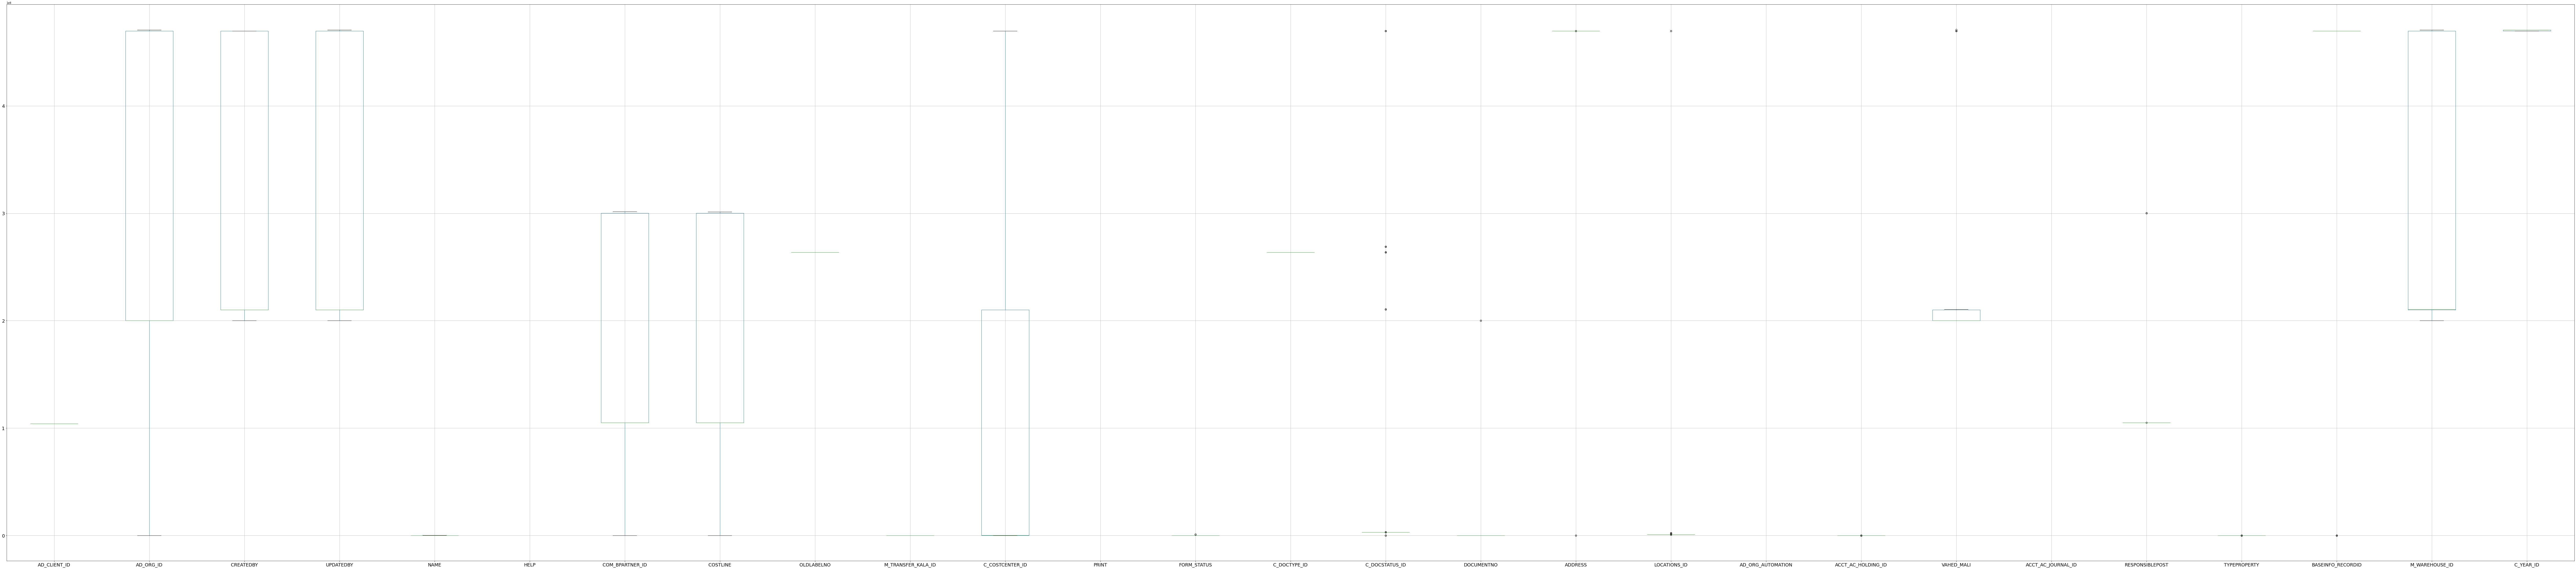

In [ ]:
TRANSFER_ITEM = pd.read_csv('TRANSFER_ITEM.csv')
display(operation(TRANSFER_ITEM))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,12,13,14,15,16,17,18,24,26,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


,CREATEDBY,UPDATEDBY,NAME,COM_BPARTNER_ID,M_WAREHOUSE_ID,M_TAG_ID,DOCUMENTNO,LOCATIONS_ID,RESPONSIBLEPOST,TYPEPROPERTY,C_YEAR_ID,BASEINFO_RECORDID,VAHED_MALI,TYPE_PRODUCT,Unnamed: 36
mean,326831854.476837,325664385.391202,232717921.176471,149279959.903488,263898185.701392,465700791.538452,55122.685483,1047380.970833,234144757.807947,1.121685,470169602.320875,450072243.780073,244040702.027423,1.000007,1.0
mode,[210033614.0],[210033614],[300001361.0],[300375141.0],[210618922.0],[469707724.0],[125.0],[1000042.0],[300005012.0],[1.0],[469637411.0],[469638726.0],[200000130.0],[1.0],[1.0]
type,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
range,1302.0 to 9200000539.11,1000007 to 470766434,104006598.0 to 300007662.0,0.0 to 469772237.0,200000101.0 to 470637471.0,405.0 to 471036834.0,1.0 to 469719393.0,1000042.0 to 2100946.0,105003577.0 to 300137935.0,1.0 to 2.0,469637411.0 to 470737412.0,-1.0 to 469638836.0,200000114.0 to 470852650.0,1.0 to 2.0,1.0 to 1.0
median,210034932.0,210034932.0,300001361.0,105004104.0,210618922.0,469739610.0,28706.0,1000058.0,300005012.0,1.0,469637411.0,469638630.0,200000138.0,1.0,1.0
min,1302.0,1000007,104006598.0,0.0,209153224.5,469579955.5,1.0,1000042.0,105003577.0,1.0,469637411.0,469638021.0,200000114.0,1.0,1.0
max,859050886.5,470766434,300007662.0,469772237.0,211498340.5,469897719.5,178953.5,1000688.0,300137935.0,1.0,470737412.0,469638836.0,200001502.5,1.0,1.0
outliers,1,0,0,0,6894,3101,223,14444,0,4313,0,2120,8472,1,0


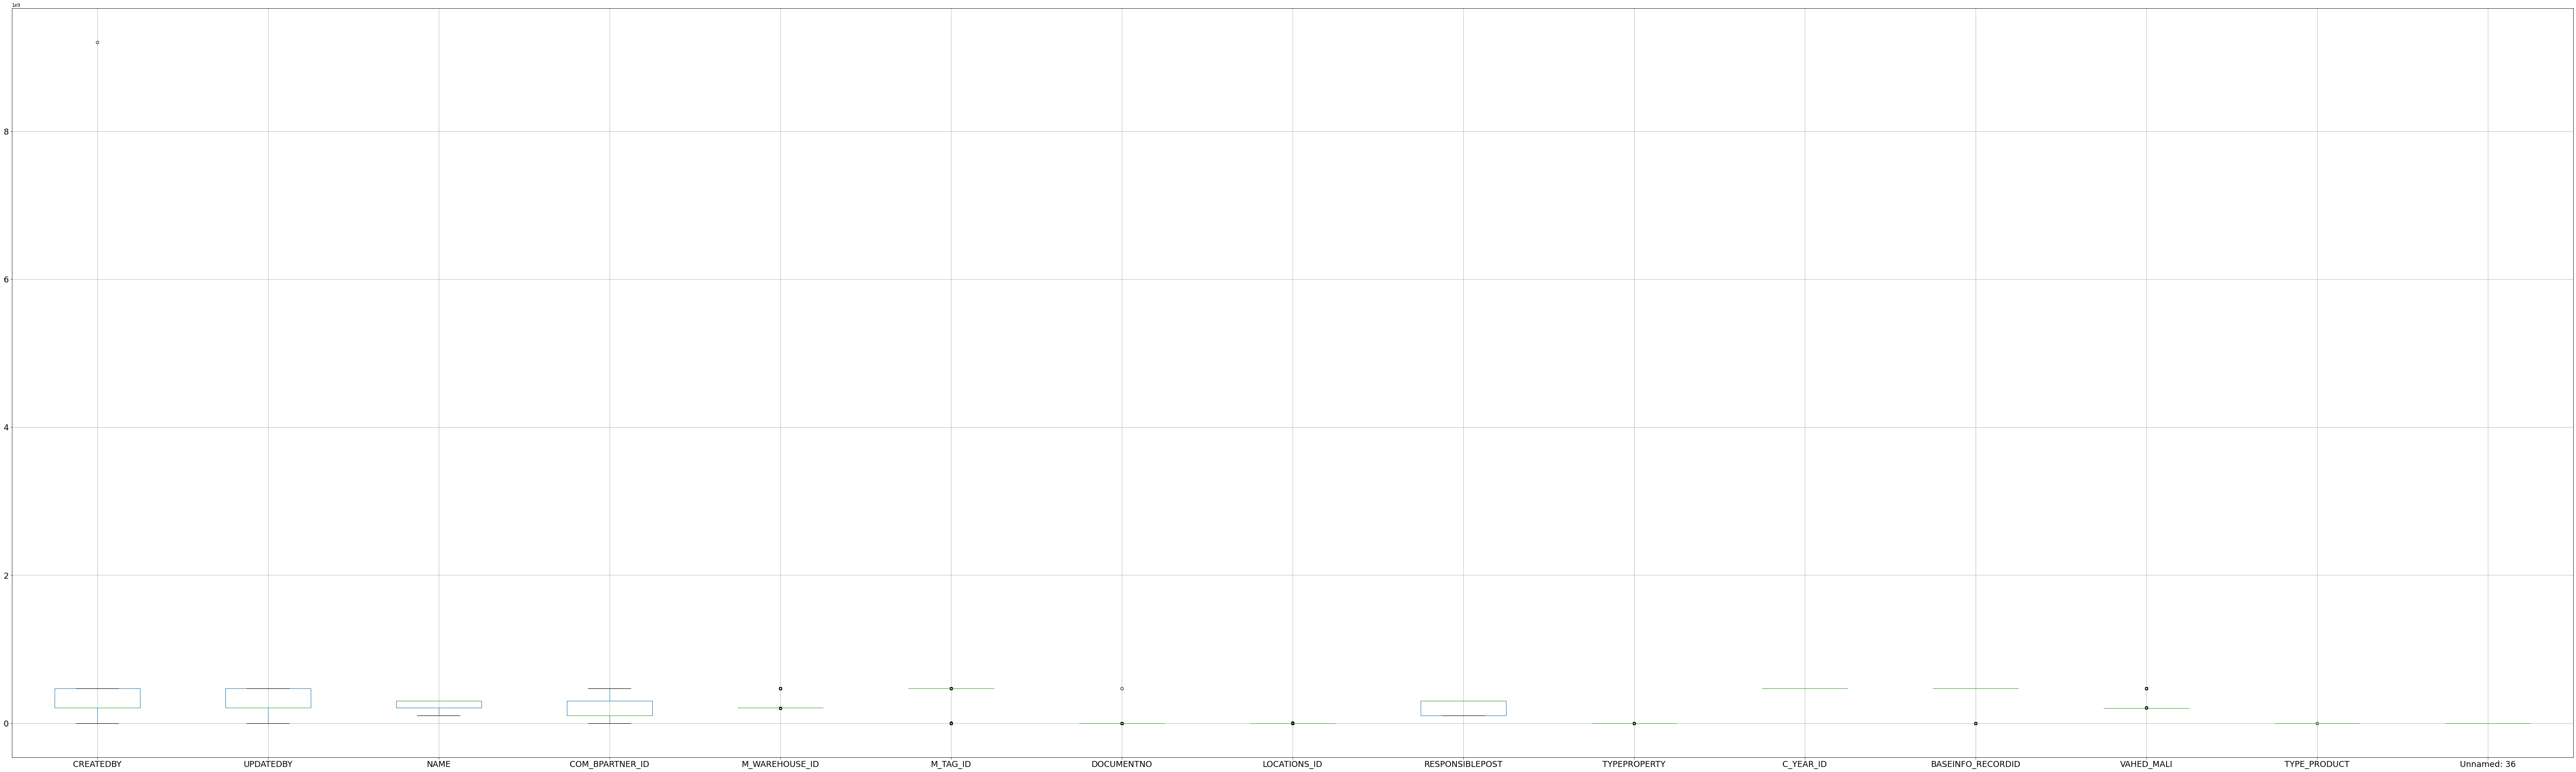

In [ ]:
TRANSFER_ITEM_D = pd.read_csv('TRANSFER_ITEM_D.csv')
display(operation(TRANSFER_ITEM_D))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,M_PRODUCT_ID,UPDATEDBY,AD_ORG_REF_ID,M_PI_STATUS_ID,C_STATE_ID,C_PROVINCE_ID,PRICE9,NEWLABELNO,SALVAGEVALUE,PI_VALUEAFTERCOEFFICIENTINC,COEFFICIENTVALUE,ANTIQUITYCOEFFICIENT,PRESENTVALUE,DISPOSALTYPE,BOOKVALUE,COM_BPARTNER_ID,DEPRECATIONRATE,RETURNAMVALTOANBAR,TYPEMELKOFCONTRACT,AREA_TOTAL,OLD_AVOSOLID
mean,109391628.248942,237407303.404473,242522860.871503,46256179.464318,728039.643425,2828006.45898,143153812.027273,268598780.0,13772235.346431,95216330.492497,1.212077,1.242834,1590321.080336,3000000.0,5706506.528129,178502568.325576,210618919.0,3.09344,2.341463,71508.331385,212123235.539101
mode,[3028814.0],[102000026.0],[106536008.0],[1000016.0],[1201.0],[1345.0],[1304.0],[469638128.0],[0.0],[0.0],[1.0],[1.0],[171000.0],[0.0],[1.0],[300375141.0],[210618919.0],[4.0],[3.0],[250.0],[1000042.0]
type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
range,43.0 to 470857818.0,-1.0 to 470766472.0,0.0 to 470751468.0,0.0 to 469637420.0,1193.0 to 469638234.0,57.0 to 469638634.0,0.0 to 469638128.0,1201.0 to 469638128.0,0.0 to 443880000.0,0.0 to 56000000000.0,0.0 to 5.0,0.0 to 5.0,0.0 to 78546000.0,0.0 to 35000000.0,0.0 to 16202176237.0,0.0 to 469663395.0,210618919.0 to 210618919.0,1.0 to 4.0,1.0 to 3.0,-104592.0 to 2123328238.0,0.0 to 1414120170.0
median,3028814.0,210032939.0,200000141.0,1000016.0,1201.0,1345.0,1304.0,469638128.0,77625.0,1225000.0,1.0,1.0,475000.0,0.0,1.0,105004528.0,210618919.0,4.0,3.0,250.0,208403435.0
min,43.0,184071770.5,0.0,0.0,1201.0,1345.0,0.0,1201.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,210618919.0,1.0,1.0,-222.4875,208403321.0
max,255493492.0,226547350.5,470751468.0,12999978.5,1201.0,1345.0,469638128.0,469638128.0,45396000.0,25650000.0,1.0,3.5,3274531.25,187500.0,1997489.125,469663395.0,210618919.0,4.0,3.0,721.0925,208403545.0
outliers,142706,316372,0,104708,38839,120026,0,0,658,560,834,10,86,3,23007,0,0,0,0,46868,23


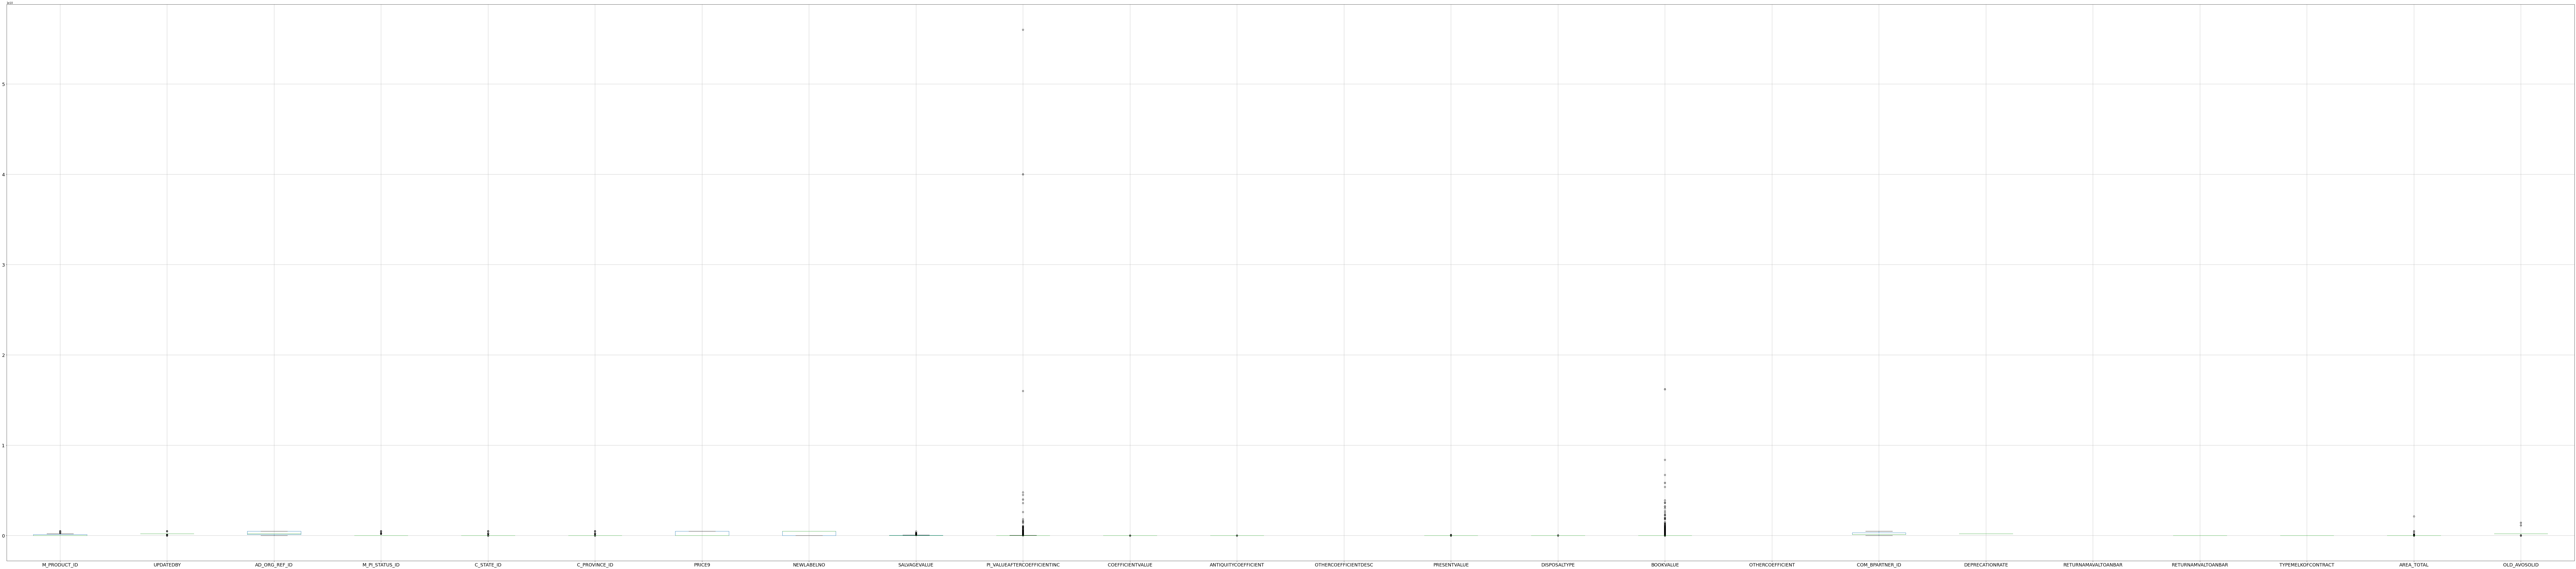

In [ ]:
PRODUCTINSTANCE = pd.read_csv('PRODUCTINSTANCE.csv', encoding='cp1258', low_memory=False)
display(operation(PRODUCTINSTANCE))